## Homework Set 3

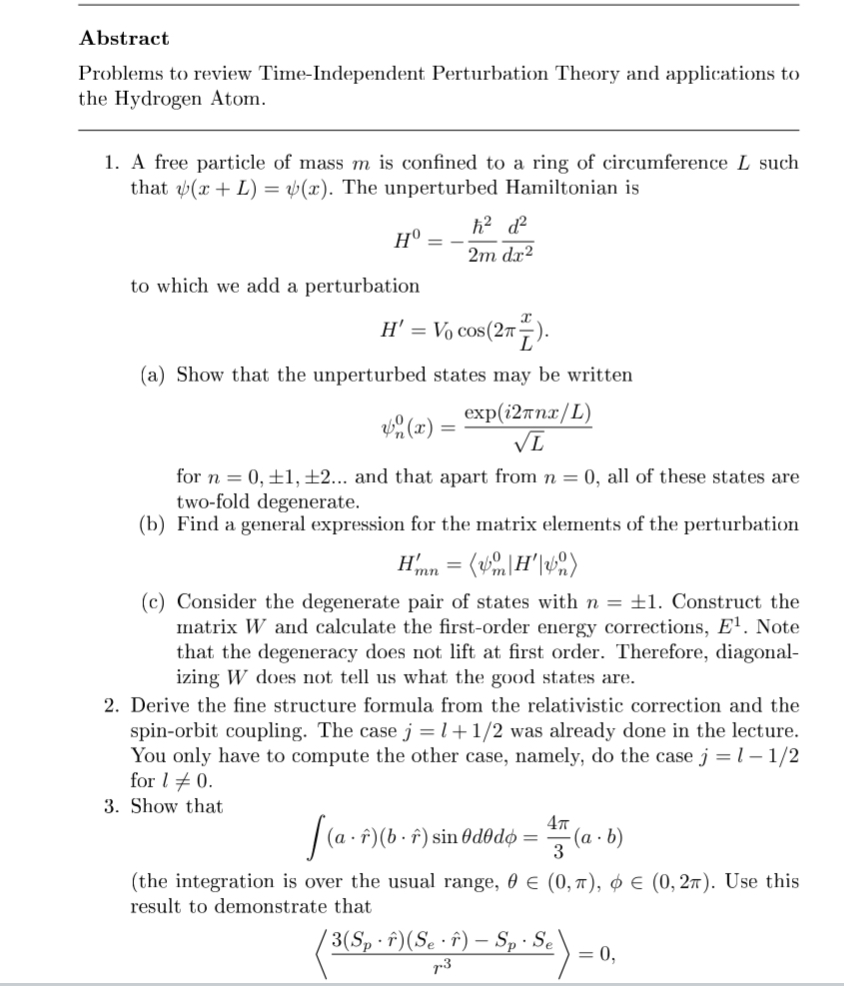

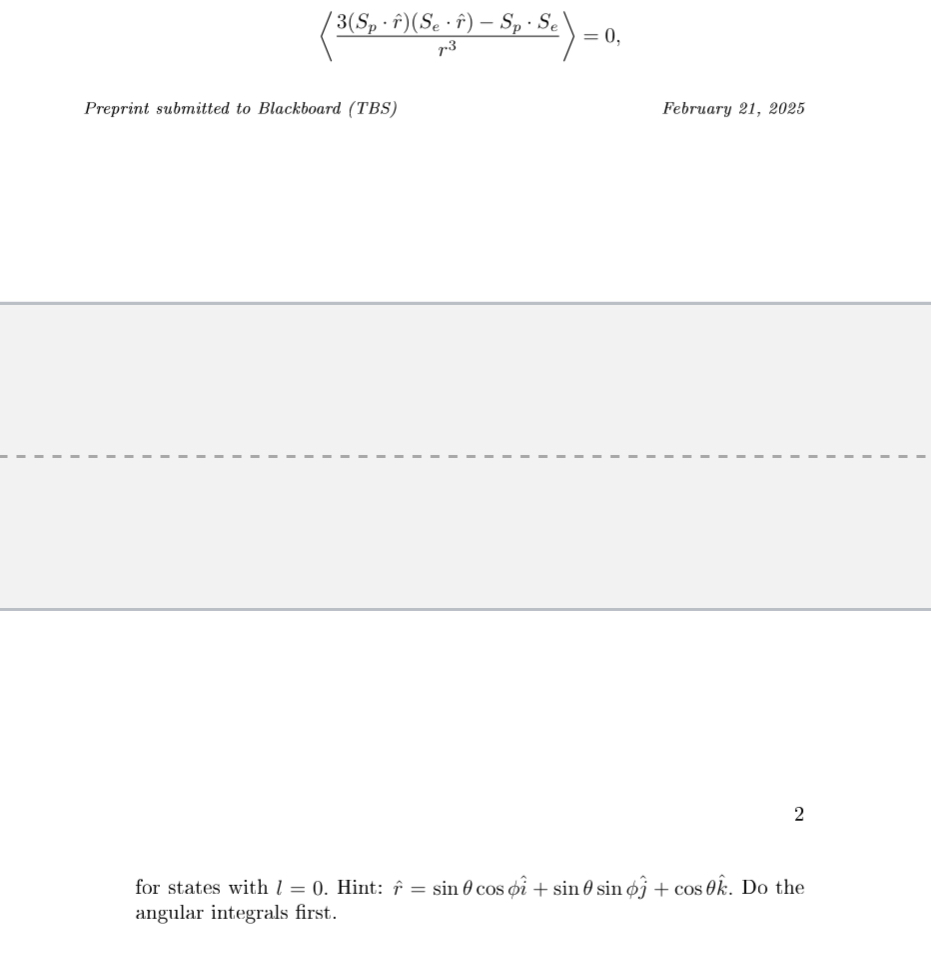

In [3]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.special import hermite, factorial, eval_hermite
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd
style.use('dark_background')
plt.rcParams['text.usetex'] = False


#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.jpeg'))

### Problem 1:
- Similar (same?) to problem we did in class 2/20. 
- Gameplan
    - Argue ring of length L w boundry conditions forces psi(x) as shown
    - Show thoes energy satisfy boundry conditions of unperturbed energies
    - We have matrix elements H', can use integral to pick out transitions n --> m.
    - Look at subspace spanned by Psi**0_(+/- 1), show diagonal and off diagonal elements are zero

In [4]:
#symbols
L, x, m, n, hbar, mass = sp.symbols('L x m n hbar m', real=True)
v0 = sp.Symbol('v0', real=True)


#part a, unperturbed eigenstates
k_n = (2 * sp.pi * n) / L
psi_n = (1/sp.sqrt(L)) * sp.exp(1j * k_n * x)
print('k_n =')
display(k_n)
print('psi_n = ')
display(psi_n)
E_n = (hbar**2 * k_n**2) / (2 * mass) #unperturbed energy eigenvalues
print('unperturbed energy eigenvalues: ')
display(E_n)

#part b, matrix element of h'_mn
H_prime = v0 * sp.cos(2 * sp.pi * x / L)
print('H_prime_mn =')
display(H_prime)

#compute matrix element h'_mn = ⟨ψ_m | H' | ψ_n⟩ --> explicit sub bc sympy weird
h_mn = sp.integrate(
    sp.conjugate(psi_n).subs(n, m) * H_prime * psi_n.subs(n, n), (x, 0, L)
).simplify()

#use kronecker delta explicitly for simplification
delta_expr = (v0/2) * (sp.KroneckerDelta(m, n+1) + sp.KroneckerDelta(m, n-1))

# Display results
h_mn_simplified = h_mn.simplify()
h_mn_explicit = h_mn_simplified.subs(h_mn_simplified, delta_expr)
print('H_mn after kroneckerdelta sub is: ')
display(h_mn_explicit)
#now part c construct matrix in subspace n = ±1
W_matrix = sp.Matrix([
    [h_mn.subs({m: 1, n: 1}), h_mn.subs({m: 1, n: -1})],
    [h_mn.subs({m: -1, n: 1}), h_mn.subs({m: -1, n: -1})]
])

#compute and display eigenvalues for first order energy correc
W_eigenvalues = W_matrix.eigenvals()

print('the matrix W in subspace n = ±1 ')
display(W_matrix)
print('the eigenvalues for the first order energy corrections are:')
W_eigenvalues_df = pd.DataFrame(
    list(W_eigenvalues.items()), columns=['Eigenvalue', 'Multiplicity']
)
display(W_eigenvalues_df)




k_n =


2*pi*n/L

psi_n = 


exp(2.0*I*pi*n*x/L)/sqrt(L)

unperturbed energy eigenvalues: 


2*pi**2*hbar**2*n**2/(L**2*m)

H_prime_mn =


v0*cos(2*pi*x/L)

H_mn after kroneckerdelta sub is: 


v0*(KroneckerDelta(m, n - 1) + KroneckerDelta(m, n + 1))/2

the matrix W in subspace n = ±1 


Matrix([
[                                                                                                      0, 0.333333333333333*I*sqrt(L)*v0*(-exp(2.0*I*pi) + exp(-2.0*I*pi))*exp(-2.0*I*pi)*conjugate(1/sqrt(L))/pi],
[-0.333333333333333*I*sqrt(L)*v0*(-exp(-2.0*I*pi) + exp(2.0*I*pi))*exp(2.0*I*pi)*conjugate(1/sqrt(L))/pi,                                                                                                       0]])

the eigenvalues for the first order energy corrections are:


,Eigenvalue,Multiplicity
0,0,2


### Problem 2:


In [5]:
#symbols
Z, alpha, m, c, n, l, j = sp.symbols('Z alpha m c n l j', real=True, positive=True)

#ke relativistic corrections
E_rel = - (Z * alpha)**4 * m * c**2 / (2 * n**4) * (4/n - 3/(l + sp.Rational(1/2)))

#spin orbit correction
E_so = (Z * alpha)**4 * m * c**2 / (n**3) * (l / ((l + sp.Rational(1/2)) * (l + 1)))

#fine struct. corrections
E_fs = E_rel + E_so

#show in terms of j
E_final = E_fs.subs(j, l - sp.Rational(1/2))

display(E_rel, E_so,E_final)

-Z**4*alpha**4*c**2*m*(-3/(l + 1/2) + 4/n)/(2*n**4)

Z**4*alpha**4*c**2*l*m/(n**3*(l + 1/2)*(l + 1))

Z**4*alpha**4*c**2*l*m/(n**3*(l + 1/2)*(l + 1)) - Z**4*alpha**4*c**2*m*(-3/(l + 1/2) + 4/n)/(2*n**4)

## Problem 3:

In [18]:
#we use/define spherical
theta, phi = sp.symbols('theta phi')
ax, ay, az, bx, by, bz = sp.symbols('a_x a_y a_z b_x b_y b_z')

#def rhat in sphere (ugh lol)
r_hat = sp.Matrix([sp.sin(theta) * sp.cos(phi), sp.sin(theta) * sp.sin(phi), sp.cos(theta)])
print('r_hat is:')
display(r_hat)


#def vectors a and b
a_vec = sp.Matrix([ax, ay, az])
b_vec = sp.Matrix([bx, by, bz])
print('vects a, and b are: ')
display(a_vec,b_vec)

#dot each w/ rhat
a_dot_r = a_vec.dot(r_hat)
b_dot_r = b_vec.dot(r_hat)
display('a and b dotted with r is: ')
display(a_dot_r,b_dot_r)

#set up that there integrand
integrand = (a_dot_r * b_dot_r) * sp.sin(theta)
print('the super long integrand that I had to do by hand :( :')
display(integrand)

#integrateee
#over theta and phi
integral = sp.integrate(integrand, (phi, 0, 2*sp.pi), (theta, 0, sp.pi))

#simplify it
integral_simplified = sp.simplify(integral)

print('after integrating:')
display(integral_simplified)


r_hat is:


Matrix([
[sin(theta)*cos(phi)],
[sin(phi)*sin(theta)],
[         cos(theta)]])

vects a, and b are: 


Matrix([
[a_x],
[a_y],
[a_z]])

Matrix([
[b_x],
[b_y],
[b_z]])

'a and b dotted with r is: '

a_x*sin(theta)*cos(phi) + a_y*sin(phi)*sin(theta) + a_z*cos(theta)

b_x*sin(theta)*cos(phi) + b_y*sin(phi)*sin(theta) + b_z*cos(theta)

the super long integrand that I had to do by hand :( :


(a_x*sin(theta)*cos(phi) + a_y*sin(phi)*sin(theta) + a_z*cos(theta))*(b_x*sin(theta)*cos(phi) + b_y*sin(phi)*sin(theta) + b_z*cos(theta))*sin(theta)

after integrating:


4*pi*(a_x*b_x + a_y*b_y + a_z*b_z)/3

In [38]:
#for second part S and r def
Se_x, Se_y, Se_z = sp.symbols('Se_x Se_y Se_z')
r_x, r_y, r_z = sp.symbols('r_x r_y r_z')
r = sp.symbols('r', positive=True)

#def spin vect
S_e = sp.Matrix([Se_x, Se_y, Se_z])
print('our spin vector S_e is:')
display(S_e)

#S_e dot r
S_e_dot_r = S_e.dot(r_hat)
print('the dot of S_e and r is: ')
display(S_e_dot_r)

#compute full term of expr given by prof: (3(S_e . r)(S_e . r_hat) - S_e . S_e) / r**3
expr = (3 * (S_e_dot_r * S_e_dot_r) - S_e.dot(S_e)) / r**3
print('full expression is: ')
display(expr)

#sub delta identiy w/matrix knowing ⟨r_i r_j⟩ = (1/3) δ_ij to simplify
delta_ij = sp.eye(3) / 3  #1/3 for K.delta
print('our kroniker delta is of the form:')
display(delta_ij)

#loop through ⟨S_e . r S_e . r_hat⟩ 
expected_value = 0
results = []  # To store the results

#loop through i and j
for i in range(3):
    for j in range(3):
        expected_value += 3 * S_e[i] * S_e[j] * delta_ij[i, j]
        results.append({
            'i': i,
            'j': j,
            'expected_value': expected_value
        })

#convert to df for formatting
df = pd.DataFrame(results, columns=['i', 'j', 'expected_value'])

#display df
display("Expected Values Table:", df)

#final expecattion value
expected_value -= S_e.dot(S_e)

#show final
print('final expcatation value: ')
display(expected_value.simplify())


our spin vector S_e is:


Matrix([
[Se_x],
[Se_y],
[Se_z]])

the dot of S_e and r is: 


Se_x*sin(theta)*cos(phi) + Se_y*sin(phi)*sin(theta) + Se_z*cos(theta)

full expression is: 


(-Se_x**2 - Se_y**2 - Se_z**2 + 3*(Se_x*sin(theta)*cos(phi) + Se_y*sin(phi)*sin(theta) + Se_z*cos(theta))**2)/r**3

our kroniker delta is of the form:


Matrix([
[1/3,   0,   0],
[  0, 1/3,   0],
[  0,   0, 1/3]])

'Expected Values Table:'

,i,j,expected_value
0,0,0,Se_x**2
1,0,1,Se_x**2
2,0,2,Se_x**2
3,1,0,Se_x**2
4,1,1,Se_x**2 + Se_y**2
5,1,2,Se_x**2 + Se_y**2
6,2,0,Se_x**2 + Se_y**2
7,2,1,Se_x**2 + Se_y**2
8,2,2,Se_x**2 + Se_y**2 + Se_z**2


final expcatation value: 


0